In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
import joblib

<Figure size 1008x576 with 0 Axes>

<Figure size 1008x576 with 0 Axes>

In [5]:
titanic = pd.read_csv("C:/Users/user/Downloads/Titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.drop(['PassengerId','Name','Ticket','Embarked','Cabin'],inplace=True,axis=1)

#### Missing Values for features

In [8]:
[[features,titanic[features].isnull().sum()] for features in titanic.columns if titanic[features].isnull().sum()>0]

[['Age', 177]]

#### Heat Map for Missing Values

<AxesSubplot:>

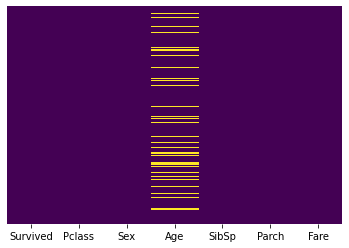

In [9]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [11]:
pd.crosstab(titanic.Pclass,titanic.Survived,margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [12]:
pd.crosstab([titanic.Sex,titanic.Survived],titanic.Pclass,margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

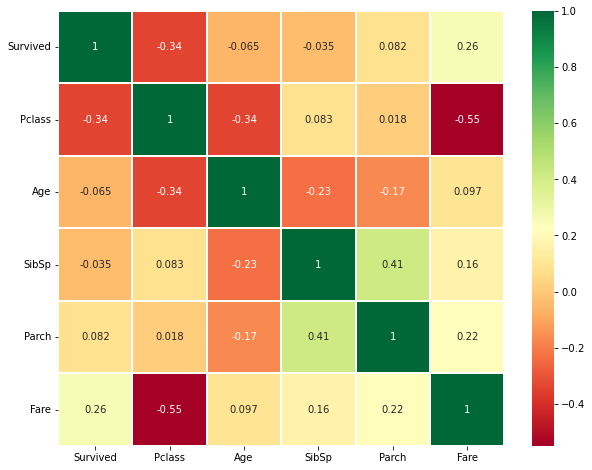

In [13]:
sns.heatmap(titanic.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
text_data=['Sex']
for i in text_data:
  titanic[i]=le.fit_transform(titanic[i].astype(str))

In [15]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [16]:
X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70 , test_size = 0.30, random_state = 1, shuffle=True)

In [24]:
from sklearn import tree
#classifier = tree.DecisionTreeClassifier()
classifier = tree.DecisionTreeClassifier(max_depth=3, )

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
accuracy_score(y_test, y_pred)

0.7873134328358209

In [26]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[135,  18],
       [ 39,  76]], dtype=int64)

Text(33.0, 0.5, 'Truth')

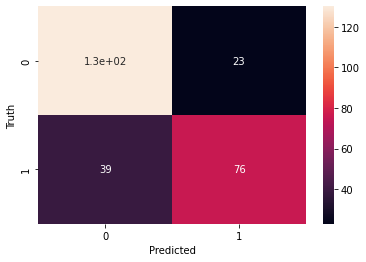

In [21]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       153
           1       0.81      0.66      0.73       115

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



#### References

https://www.kaggle.com/code/kanncaa1/dataiteam-titanic-eda/notebook

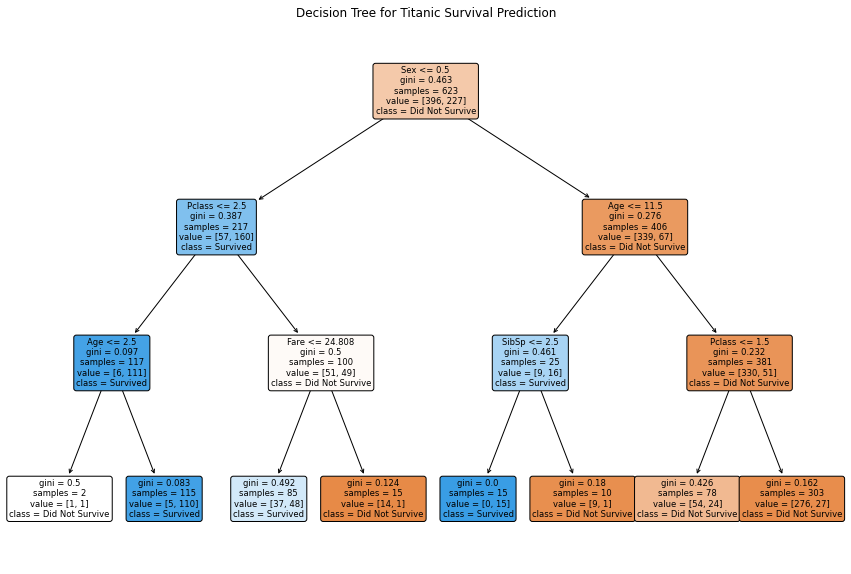

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(15, 10))  # Adjust figure size for better visualization
plot_tree(classifier, filled=True, feature_names=X.columns, class_names=['Did Not Survive', 'Survived'], rounded=True)
plt.title("Decision Tree for Titanic Survival Prediction")
plt.show()

In [ ]:
# Replace `model` with the variable name of your trained model
joblib.dump(clf, 'titanic_model.pkl')